# Clasificación de PDE

Consideremos ecuaciones diferenciales parciales de segundo orden con dos variables independientes, las cuales se pueden expresar como 

$
au_{xx}+bu_{xy}+cu_{yy}+du_{x}+eu_{y}+fu=0
$

Las soluciones a las ecuaciones con la forma anteiror tiene diferentes propiedades dependientdo de los coeficientes de los terminos de mayor orden, es decir $a,b,c$. Podemos clasificar estas ecuaciones en tres categorias:

* Hiperbólica si $b^2-4ac> 0$
* Parabólica si $b^2-4ac= 0$
* Elíptica si $b^2-4ac< 0$


## Teorema

Mediante una transformación lineal de las variables independientes, cualquier ecuación de la forma:
$
au_{xx}+bu_{xy}+cu_{yy}+du_{x}+eu_{y}+fu=0
$
 puede reducirse a alguna de las siguiente formas:
 
* Hiperbólica si $b^2-4ac> 0$

$u_{xx}-u_{yy}+\ldots = 0$
* Parabólica si $b^2-4ac= 0$

$u_{xx}+\ldots = 0$
* Elíptica si $b^2-4ac< 0$

$u_{xx}+u_{yy}+\ldots = 0$


donde $\ldots$ representa los términos de menor orden.

## Teorema

Considere la siguiente PDE $u_{xx}+u_{yy}=0$

¿De que tipo es la PDE anterior?

Elíptica

# Método Crank-Nicholson

Este método se basa en diferencias finitas para resolver una ecuación diferencial parcial. Fue desarrollado por John Crank y Phyllis Nicholson a mediados del siglo 20.

Este método es una combinación del método de Euler forward y backward

$\dfrac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=F_{i}^{n}\left(u,x,t,\dfrac{\partial u}{\partial x},\dfrac{\partial^2 u}{\partial x^2}\right)\rightarrow$ Forward

$\dfrac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=F_{i+1}^{n+1}\left(u,x,t,\dfrac{\partial u}{\partial x},\dfrac{\partial^2 u}{\partial x^2}\right)\rightarrow$ Backward

es decir

$\dfrac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\dfrac{1}{2}\left(F_{i+1}^{n+1}\left(u,x,t,\dfrac{\partial u}{\partial x},\dfrac{\partial^2 u}{\partial x^2}\right)+F_{i}^{n}\left(u,x,t,\dfrac{\partial u}{\partial x},\dfrac{\partial^2 u}{\partial x^2}\right)\right)$ 

# Ejemplo:

Consideremos la ecuación de calor

$\dfrac{\partial^2 u}{\partial^2 x}-\dfrac{\partial u}{\partial t}=0$ en el intervalo $[0,1]$ con las condiciones de frontera $u(x=0,t)=0$, $u(x=1,t)=0$, $u(x,t=0)=2x$ si $x\leq 0.5$ y $u(x,t=0)=2(1-x)$ si $0.5<x$.

Entonces, sustituyendo la expresión de diferencias finitas para las derivadas de segundo orden se tiene

$
\dfrac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\dfrac{1}{2\Delta x^2}\left((u_{i+1}^{n+1}-2u_{i}^{n+1}+u_{i-1}^{n+1})+(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})\right)
$

definiendo $\lambda = \dfrac{\Delta t}{2\Delta x^2}$ tenemos

$
-\lambda u_{i+1}^{n+1}+(1+2\lambda)u_{i}^{n+1}-\lambda u_{i-1}^{n+1}=\lambda u_{i+1}^{n}+(1-2\lambda)u_{i}^{n}+\lambda u_{i-1}^{n}
$

notemos que el indice $n$ corresponde a la variable $t$ y el indice $i$ a la variable $x$. Y que la expresión anterior nos permite calcular $u$ para el tiempo $n+1$ a partir de conocer $u$ al tiempo $n$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N=5
x_coord =  np.linspace(0,1,N)
t_coord =  np.linspace(0,1,N)

In [8]:
X,Y = np.meshgrid(x_coord,t_coord)
X_int,Y_int = np.meshgrid(x_coord[1:-1],t_coord[1:])

Text(0, 0.5, 't (n)')

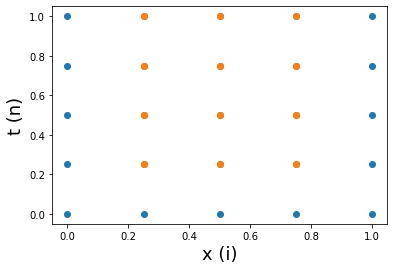

In [15]:
plt.scatter (X,Y)
plt.scatter (X_int,Y_int)
plt.xlabel("x (i)", fontsize=18)
plt.ylabel("t (n)", fontsize=18)

$
-\lambda u_{i+1}^{n+1}+(1+2\lambda)u_{i}^{n+1}-\lambda u_{i-1}^{n+1}=\lambda u_{i+1}^{n}+(1-2\lambda)u_{i}^{n}+\lambda u_{i-1}^{n}
$

Para $n=0,i=1$ se tiene:

$
-\lambda u_{2}^{1}+(1+2\lambda)u_{1}^{1}-\lambda u_{0}^{1}=\lambda u_{2}^{0}+(1-2\lambda)u_{1}^{0}+\lambda u_{0}^{0}
$

Notemos que el lado derecho de la ecuación es conocido, ya que son las condiciones de frontera. 

Si $n=0, i=2$

$
-\lambda u_{3}^{1}+(1+2\lambda)u_{2}^{1}-\lambda u_{1}^{1}=\lambda u_{3}^{0}+(1-2\lambda)u_{2}^{0}+\lambda u_{1}^{0}
$

Si $n=0, i=3$

$
-\lambda u_{4}^{1}+(1+2\lambda)u_{3}^{1}-\lambda u_{2}^{1}=\lambda u_{4}^{0}+(1-2\lambda)u_{3}^{0}+\lambda u_{2}^{0}
$

Si $n=0, i=4$ tenemos la condicion de frontera $u_4^0=0$


Las ecuaciones anteriores se pueden escribir de manera matricial como:

$
\left[\begin{array}{ccccc}
1&0&0&0&0\\
-\lambda & 1+2\lambda& -\lambda &0 & 0\\
0&-\lambda & 1+2\lambda& -\lambda &0\\
0& 0&-\lambda & 1+2\lambda& -\lambda\\
0&0&0&0&1
\end{array}\right]
\left[\begin{array}{c}
u_0^1\\
u_1^1\\
u_2^1\\
u_3^1\\
u_4^1\\
\end{array}\right]
=
\left[\begin{array}{c}
0\\
\lambda u_2^0 + (1-2\lambda) u_1^0+\lambda u_0^0\\
\lambda u_{3}^{0}+(1-2\lambda)u_{2}^{0}+\lambda u_{1}^{0}\\
\lambda u_{4}^{0}+(1-2\lambda)u_{3}^{0}+\lambda u_{2}^{0}\\
0\\
\end{array}\right]\cdots (1)
$

Entonces resolviendo el sistema anterior de ecuaciones podemos encontrar los valores del vector  

$u(x,t_{n=1})=\left[\begin{array}{c}
u_0^1\\
u_1^1\\
u_2^1\\
u_3^1\\
u_4^1\\
\end{array}\right]$

es decir $u$ para el tiempo $n=1$

La euación (1) se puede generalizar para los diferenctes valores de $n$:

$
\left[\begin{array}{ccccc}
1&0&0&0&0\\
-\lambda & 1+2\lambda& -\lambda &0 & 0\\
0&-\lambda & 1+2\lambda& -\lambda &0\\
0& 0&-\lambda & 1+2\lambda& -\lambda\\
0&0&0&0&1
\end{array}\right]
\left[\begin{array}{c}
u_0^{n+1}\\
u_1^{n+1}\\
u_2^{n+1}\\
u_3^{n+1}\\
u_4^{n+1}\\
\end{array}\right]
=
\left[\begin{array}{c}
0\\
\lambda u_2^n + (1-2\lambda) u_1^n+\lambda u_0^n\\
\lambda u_{3}^{n}+(1-2\lambda)u_{2}^{n}+\lambda u_{1}^{n}\\
\lambda u_{4}^{n}+(1-2\lambda)u_{3}^{n}+\lambda u_{2}^{n}\\
0\\
\end{array}\right]\cdots (1)
$


Es decir, que tenemos una ecuacion de la forma $Au=b$.

Para implementar el método primero definimos

In [42]:
N = 5
x = np.linspace(0,1,N)
dt = 5e-2
dx = x[1]-x[0]
l = dt/(2*dx**2)

Luego comenzamos a construir la matriz $A$

In [43]:
A_1 = (1+2*l)*np.eye(N)-l*np.eye(N,k=1)-l*np.eye(N,k=-1)
A_1

array([[ 1.8, -0.4,  0. ,  0. ,  0. ],
       [-0.4,  1.8, -0.4,  0. ,  0. ],
       [ 0. , -0.4,  1.8, -0.4,  0. ],
       [ 0. ,  0. , -0.4,  1.8, -0.4],
       [ 0. ,  0. ,  0. , -0.4,  1.8]])

Agregamos las codiciones de frontera

In [44]:
A_1[0][0] = 1
A_1[0][1] = 0
A_1[-1][-1] = 1
A_1[-1][-2] = 0
A = A_1

Ahora definimos las condiciones inciales $u^0= u(x,t_{n=0})$

$u(x,t=0)=2x$ si $x\leq 0.5$ y $u(x,t=0)=2(1-x)$ si $0.5<x$.

In [45]:
u_t0 = np.zeros(N)
x = np.linspace(0,1,N)
j = 0
for i in x:
    if i <= 0.5:
        u_t0[j] = 2*i
    else:
        u_t0[j] = 2*(1-i)
    j += 1
u_t0

array([0. , 0.5, 1. , 0.5, 0. ])

Nuestra condición inicial es:

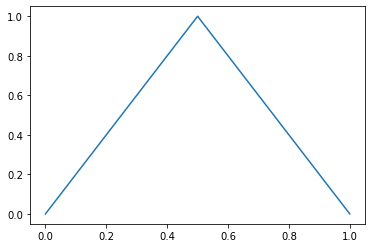

In [46]:
plt.plot(x,u_t0)

Para ver como evoluciona con el tiempo tenemos que calcular el vector $b$

$\left[\begin{array}{c}
0\\
\lambda u_2^0 + (1-2\lambda) u_1^0+\lambda u_0^0\\
\lambda u_{3}^{0}+(1-2\lambda)u_{2}^{0}+\lambda u_{1}^{0}\\
\lambda u_{4}^{0}+(1-2\lambda)u_{3}^{0}+\lambda u_{2}^{0}\\
0\\
\end{array}\right]$

In [50]:
ui_t0 = np.zeros(N)
ui_t0 [1]= l*u_t0[0]+(1-2*l)*u_t0[1]+l*u_t0[2]
ui_t0 [2]= l*u_t0[1]+(1-2*l)*u_t0[2]+l*u_t0[3]
ui_t0 [3]= l*u_t0[2]+(1-2*l)*u_t0[3]+l*u_t0[4]
b = ui_t0
b

array([0. , 0.5, 0.6, 0.5, 0. ])

Entonces para encontrar $u(x,t=1)$ tenemos que calcular $Au=b$

In [52]:
u_t1 = np.linalg.solve(A,b)

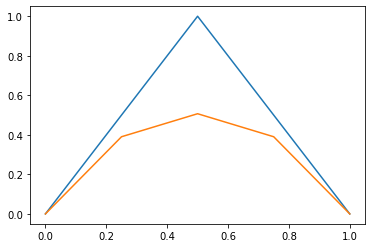

In [54]:
plt.plot(x,u_t0)
plt.plot (x,u_t1)

Ahora para encontrar $u$ para $n=2$ definimos una función que nos permita calcular el vector $b$.